In [9]:
%matplotlib inline

# Dependencies and Setup
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [11]:
# Load Hurricane Data
#hurricanes = "resources/Hurricane_data_all.csv"

# Read the Hurricane CSV files
#hurricanes = pd.read_csv(hurricanes)

# Load Index data
sp1500 = "resources/S&P1500_Sector_All.csv"
comm_services = "resources/Communication_Services.csv"
cons_discrete = "resources/Consumer_Discretionary.csv"
cons_staple = "resources/Consumer_Staples.csv"
energy = "resources/Energy.csv"
fin = "resources/Financials.csv"
hlth_care = "resources/Health_Care.csv"
i_t = "resources/Info_Technology.csv"
materials = "resources/Materials.csv"
real_estate = "resources/Real_Estate.csv"
industrial = "resources/Industrials.csv"
utilities = "resources/Utilities.csv"

# Read the Index CSV files
sp1500 = pd.read_csv(sp1500)
comm_services = pd.read_csv(comm_services)
cons_discrete = pd.read_csv(cons_discrete)   
cons_staple = pd.read_csv(cons_staple)
energy = pd.read_csv(energy)
fin  = pd.read_csv(fin)
hlth_care  = pd.read_csv(hlth_care)
i_t = pd.read_csv(i_t)
materials = pd.read_csv(materials)
real_estate = pd.read_csv(real_estate)
industrial = pd.read_csv(industrial)
utilities  = pd.read_csv(utilities)

In [12]:
sp1500.head()
#comm_services.head()
#cons_discrete.head()
#cons_staple.head()
#energy.head()
# fin.head()
#hlth_care.head()
#i_t.head()
#materials.head()
#real_estate.head()
#industrial.head()
#utilities.head()

,Date,(INDEX) S&P Composite 1500 / Consumer Discretionary - SEC - Total Return,(INDEX) S&P Composite 1500 / Communication Services -SEC - Total Return,(INDEX) S&P Composite 1500 / Consumer Staples - SEC - Total Return,(INDEX) S&P Composite 1500 / Energy - SEC - Total Return,(INDEX) S&P Composite 1500 / Financials - SEC - Total Return,(INDEX) S&P Composite 1500 / Health Care - SEC - Total Return,(INDEX) S&P Composite 1500 / Industrials - SEC - Total Return,(INDEX) S&P Composite 1500 / Information Technology - SEC - Total Return,(INDEX) S&P Composite 1500 / Materials - SEC - Total Return,(INDEX) S&P Composite 1500 Real Estate - SEC - Total Return,(INDEX) S&P Composite 1500 / Utilities - SEC - Total Return
0,12/30/2013,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,12/31/2013,0.37,-0.08,-0.03,0.92,0.34,0.00,0.43,0.71,0.26,-0.49,0.23
2,1/1/2014,0.37,-0.08,-0.03,0.92,0.34,0.00,0.43,0.71,0.26,-0.49,0.23
3,1/2/2014,-0.16,-0.68,-1.12,-0.44,-0.23,-0.58,-0.87,-0.36,-0.48,-0.66,-1.34
4,1/3/2014,-0.35,-1.31,-1.27,-0.69,0.39,-0.35,-0.55,-0.71,-0.58,0.02,-1.57


In [13]:
# Fix columns with slightly different formatting, to make all uniform (i.e., Communication and Real Estate cols)
sp1500.columns = sp1500.columns.str.replace('-SEC','- SEC').str.replace('1500 /','1500')

# Delete all special characters by replacing with empty string
sp1500.columns = sp1500.columns.str.replace(r'(','').str.replace(r')','')

# Remove remaining text we don't want
sp1500.columns = sp1500.columns.str.replace('INDEX S&P Composite 1500 ','').str.replace(' - SEC - Total Return ','')
# replaces 3 back to back spaces left over after removing other text
sp1500.columns = sp1500.columns.str.replace('   ','') 

# Replace space with underscore for ease of referencing column later on
sp1500.columns = sp1500.columns.str.replace(' ','_')

# Display the data table to see new columns
sp1500.head()

,Date,Consumer_Discretionary,Communication_Services,Consumer_Staples,Energy,Financials,Health_Care,Industrials,Information_Technology,Materials,Real_Estate,Utilities
0,12/30/2013,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,12/31/2013,0.37,-0.08,-0.03,0.92,0.34,0.00,0.43,0.71,0.26,-0.49,0.23
2,1/1/2014,0.37,-0.08,-0.03,0.92,0.34,0.00,0.43,0.71,0.26,-0.49,0.23
3,1/2/2014,-0.16,-0.68,-1.12,-0.44,-0.23,-0.58,-0.87,-0.36,-0.48,-0.66,-1.34
4,1/3/2014,-0.35,-1.31,-1.27,-0.69,0.39,-0.35,-0.55,-0.71,-0.58,0.02,-1.57


In [14]:
#Re-set columns 
sp1500['Date'] = pd.to_datetime(sp1500['Date'])
sp1500_2018_Hurricanes = sp1500[(sp1500['Date'] >= '6/1/2018') & (sp1500['Date'] <= '11/30/2018')]
sp1500_2018_Hurricanes = sp1500_2018_Hurricanes.reset_index(drop=True)

sp1500_2018_Hurricanes.head()

,Date,Consumer_Discretionary,Communication_Services,Consumer_Staples,Energy,Financials,Health_Care,Industrials,Information_Technology,Materials,Real_Estate,Utilities
0,2018-06-01,66.66,16.63,30.13,-4.46,71.39,65.13,54.39,125.36,41.66,53.07,56.16
1,2018-06-04,68.62,16.55,31.21,-5.44,72.01,65.80,54.30,127.16,42.43,54.58,55.01
2,2018-06-05,69.73,17.15,30.64,-5.68,71.33,65.63,54.74,128.19,43.43,54.00,53.94
3,2018-06-06,71.46,18.81,30.79,-5.21,74.44,67.53,56.08,129.44,45.95,54.46,50.75
4,2018-06-07,71.88,20.23,31.56,-3.60,74.81,67.32,56.41,126.97,45.16,54.38,51.46


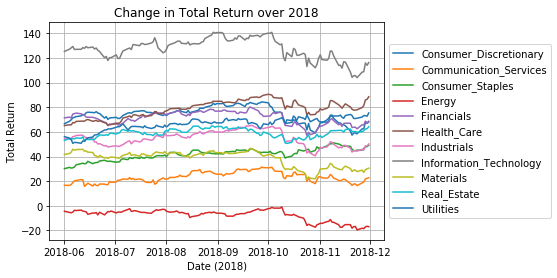

In [15]:
# Plotting 2018 graph
for x in range(1, 12):
    plt.plot(sp1500_2018_Hurricanes['Date'], sp1500_2018_Hurricanes.iloc[:,x])

# titles and labels:

plt.legend()
plt.ylabel('Total Return')
plt.xlabel('Date (2018)')
plt.title('Change in Total Return over 2018')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (30,3)
plt.show()



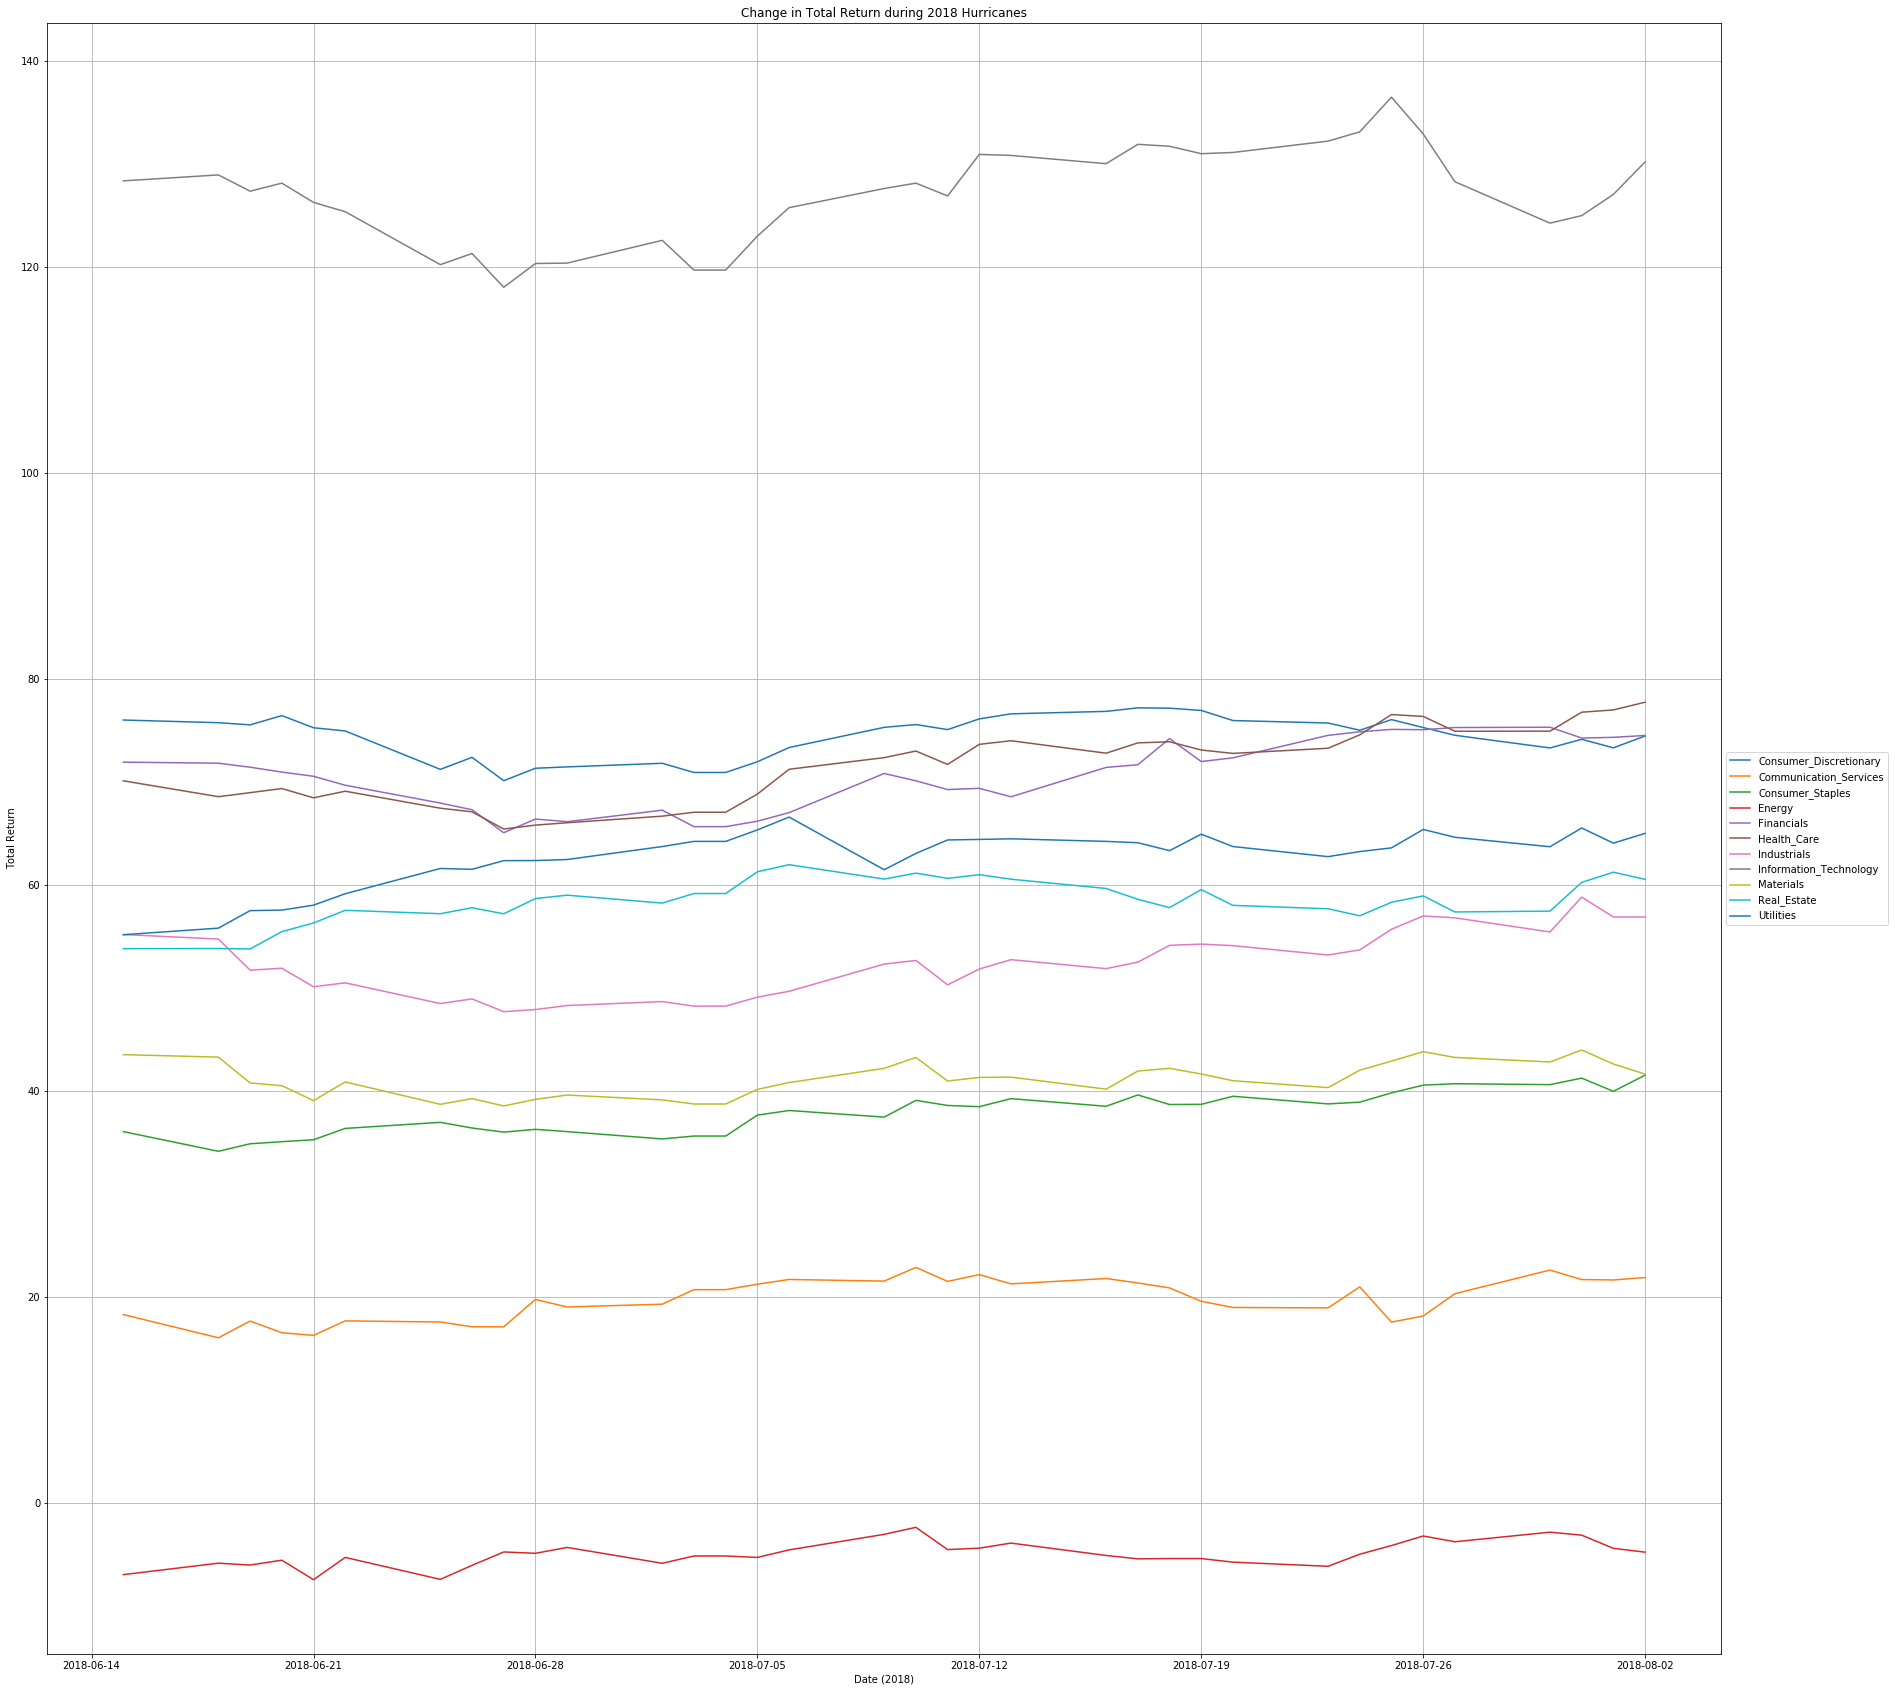

In [20]:
#Set dates for 2018 Hurricane Chris
sp1500_2018_chris = sp1500[(sp1500['Date'] >= '6/15/2018') & (sp1500['Date'] <= '8/2/2018')]
sp1500_2018_chris = sp1500_2018_chris.reset_index(drop=True)

# Plot Chris
for x in range(1, 12):
    plt.plot(sp1500_2018_chris['Date'], sp1500_2018_chris.iloc[:,x])
   
#titles and labels:

plt.legend()
plt.ylabel('Total Return')
plt.xlabel('Date (2018)')
plt.title('Change in Total Return during 2018 Hurricanes')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (30,15)
plt.show()


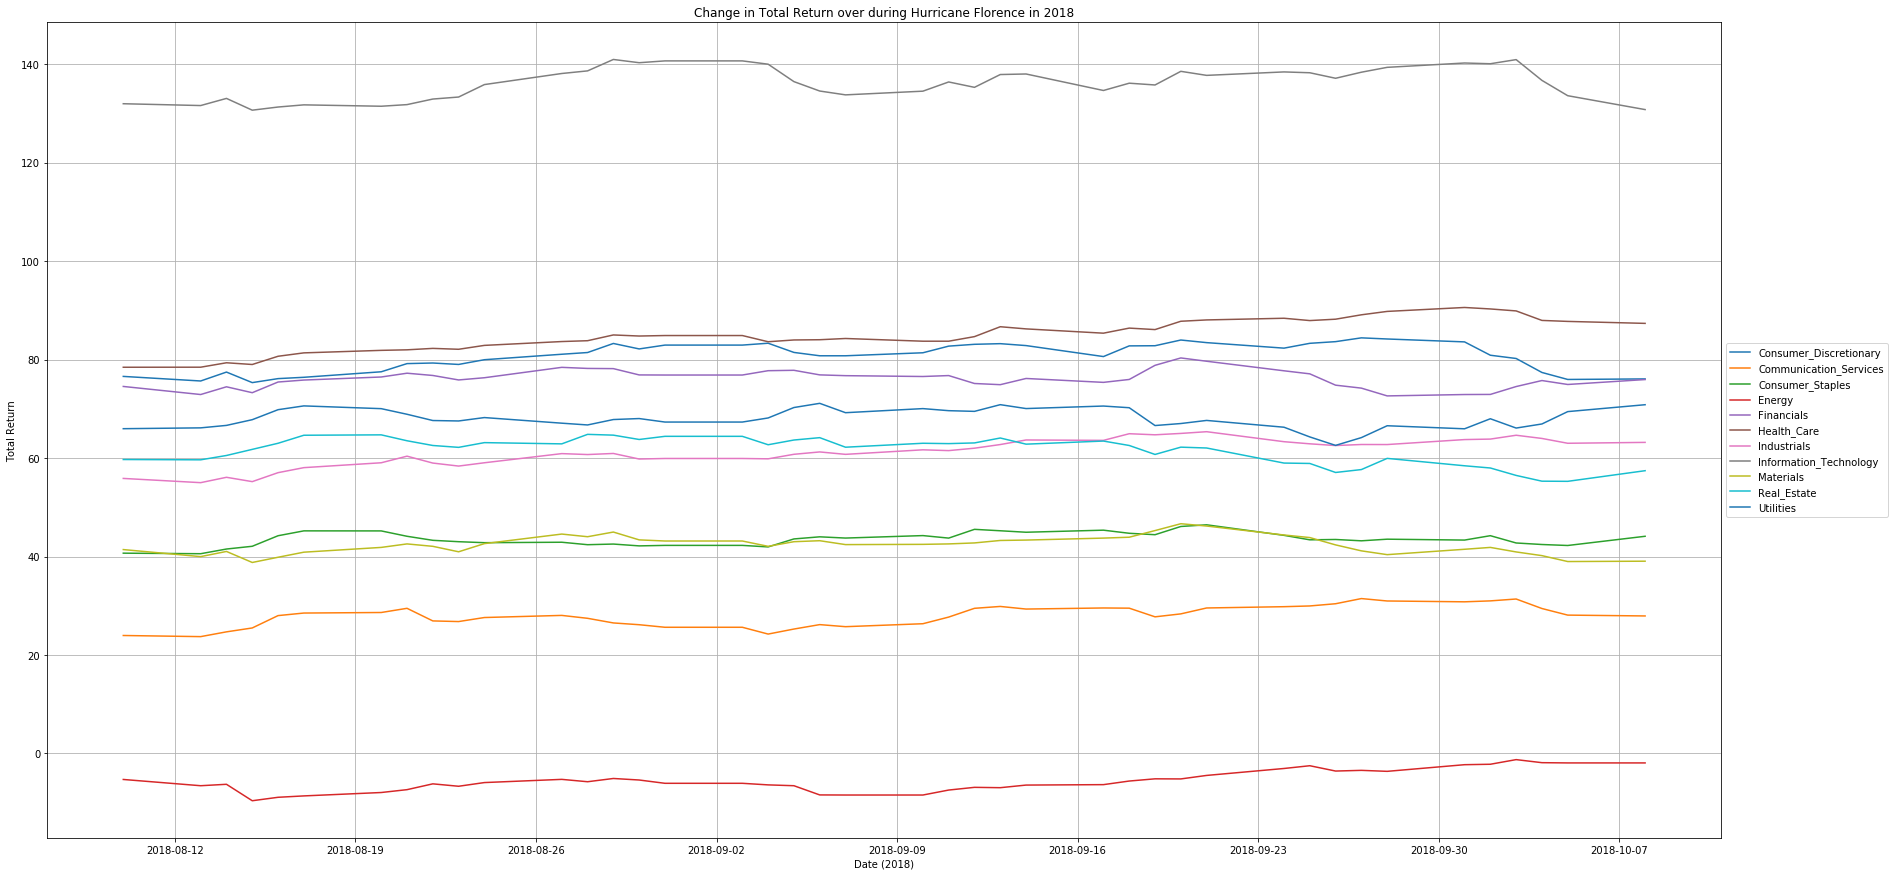

In [21]:
#Plot 2018 Hurricane Florence
sp1500_2018_florence = sp1500[(sp1500['Date'] >= '8/10/2018') & (sp1500['Date'] <= '10/8/2018')]
sp1500_2018_florence = sp1500_2018_florence.reset_index(drop=True)

# Plot Florence
for x in range(1, 12):
    plt.plot(sp1500_2018_florence['Date'], sp1500_2018_florence.iloc[:,x])

# titles and labels:

plt.legend()
plt.ylabel('Total Return')
plt.xlabel('Date (2018)')
plt.title('Change in Total Return over during Hurricane Florence in 2018')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (30,15)
plt.show()

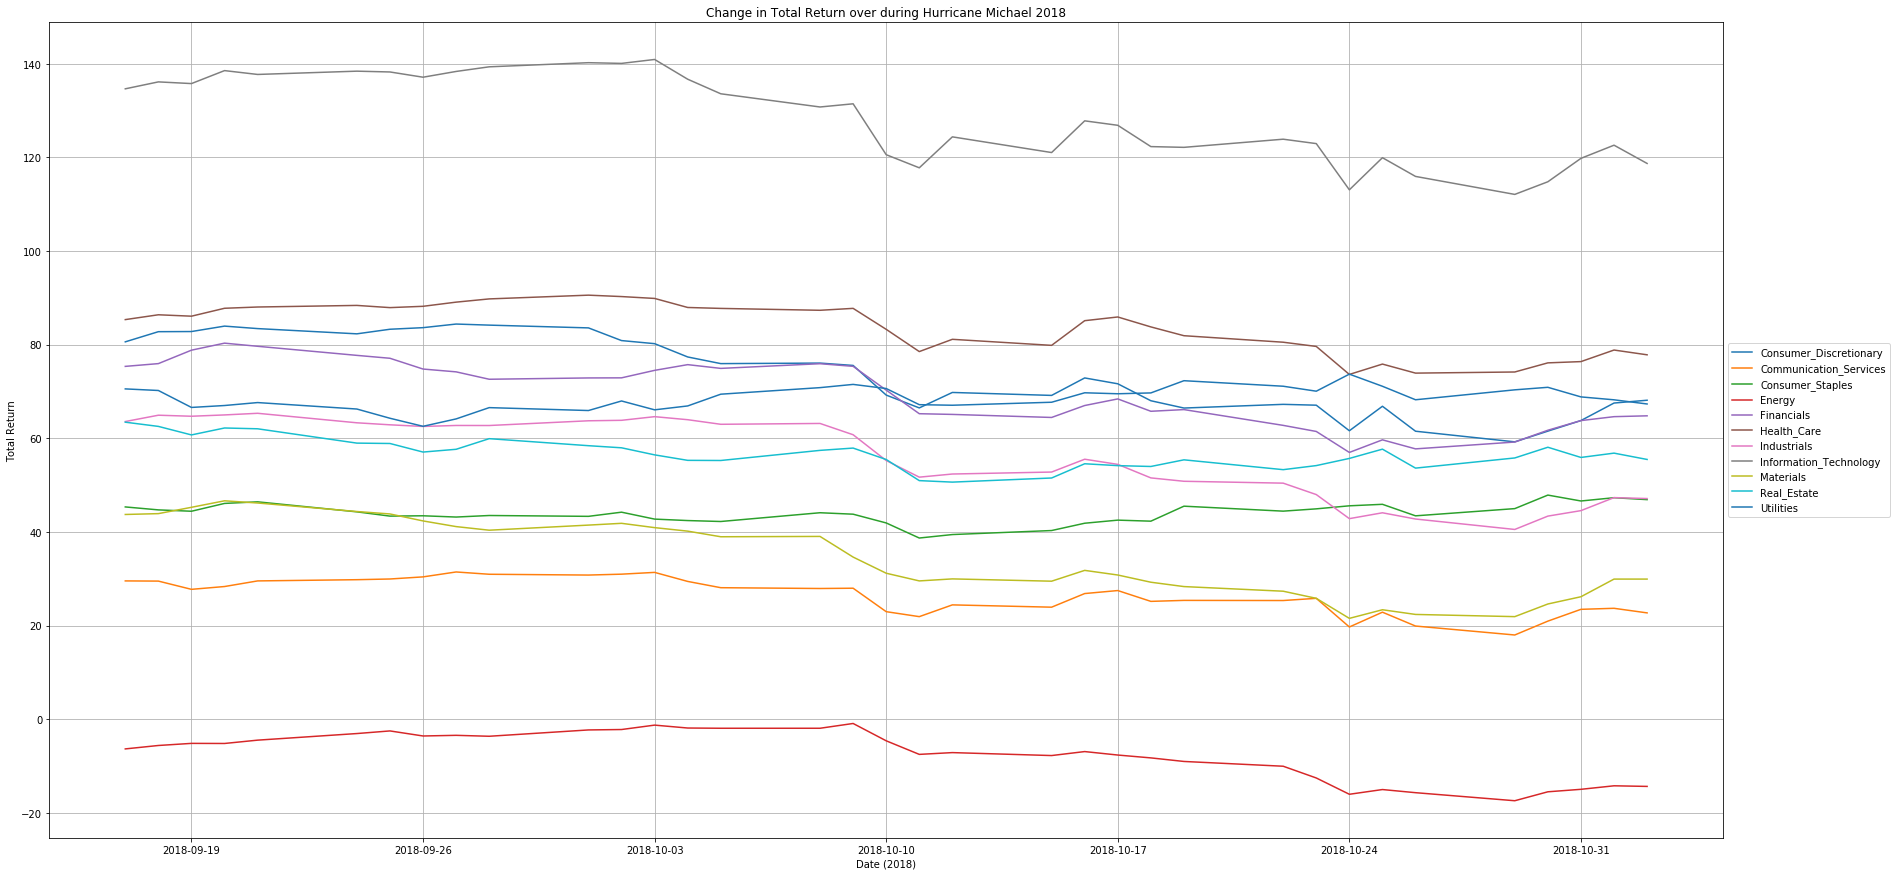

In [22]:
# Set dates 2018 Hurricane Michael

sp1500_2018_michael = sp1500[(sp1500['Date'] >= '9/16/2018') & (sp1500['Date'] <= '11/2/2018')]
sp1500_2018_michael = sp1500_2018_michael.reset_index(drop=True)


# Plot Chris
for x in range(1, 12):
    plt.plot(sp1500_2018_michael['Date'], sp1500_2018_michael.iloc[:,x])

# titles and labels:

plt.legend()
plt.ylabel('Total Return')
plt.xlabel('Date (2018)')
plt.title('Change in Total Return over during Hurricane Michael 2018')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (30,15)
plt.show()